In [37]:
from scipy.cluster.hierarchy import linkage,dendrogram

from sklearn.cluster import AgglomerativeClustering,KMeans
from sklearn.metrics import silhouette_score


import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
import seaborn as sns

<h1 style = 'color:orange'>K mean</h1>

In [27]:

milk = pd.read_csv('../Datasets/milk.csv',index_col='Animal')
scaler = StandardScaler().set_output(transform='pandas')
milk_scaled = scaler.fit_transform(milk)

clust = KMeans(random_state=25,n_clusters=3)
clust.fit(milk_scaled)
print(clust.labels_)
print(clust.inertia_)

milk_copy = milk.copy()
milk_copy['cluster'] = clust.labels_
milk_copy

[1 1 1 1 1 2 2 2 2 2 2 2 1 2 1 2 2 2 0 0 0 0 0 0 0]
36.59621161459346


,water,protein,fat,lactose,ash,cluster
Animal,,,,,,
HORSE,90.1,2.6,1.0,6.9,0.35,1
ORANGUTAN,88.5,1.4,3.5,6.0,0.24,1
MONKEY,88.4,2.2,2.7,6.4,0.18,1
DONKEY,90.3,1.7,1.4,6.2,0.40,1
HIPPO,90.4,0.6,4.5,4.4,0.10,1
CAMEL,87.7,3.5,3.4,4.8,0.71,2
BISON,86.9,4.8,1.7,5.7,0.90,2
BUFFALO,82.1,5.9,7.9,4.7,0.78,2
GUINEA PIG,81.9,7.4,7.2,2.7,0.85,2


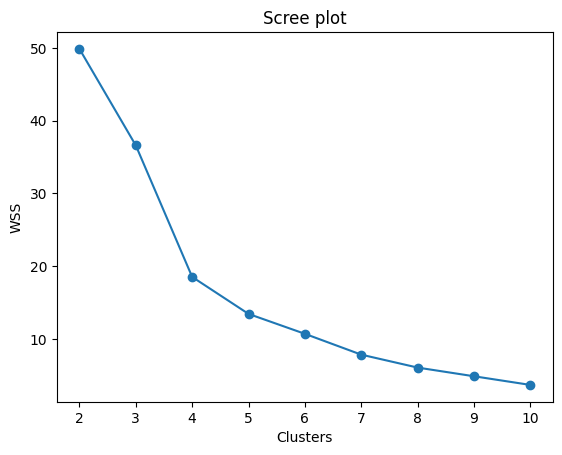

In [35]:
#for different types of linkage and different types of clusters

milk = pd.read_csv('../Datasets/milk.csv',index_col='Animal')
scaler = StandardScaler().set_output(transform='pandas')
milk_scaled = scaler.fit_transform(milk)
wss = []
for i in range(2,11):
    clust = KMeans(random_state = 25,n_clusters = i)
    clust.fit(milk_scaled)
    wss.append([i,clust.inertia_])
wss = pd.DataFrame(wss,columns=['clusters','WSS'])
plt.scatter(wss['clusters'],wss['WSS'])
plt.plot(wss['clusters'],wss['WSS'])
plt.xlabel('Clusters')
plt.ylabel('WSS')
plt.title('Scree plot')
plt.show()

<h1 style = 'color:orange'>Silhouette Score</h1>

In [36]:
milk = pd.read_csv('../Datasets/milk.csv',index_col='Animal')
scaler = StandardScaler().set_output(transform='pandas')
milk_scaled = scaler.fit_transform(milk)
scores = []
for i in range(2,11):
    clust = KMeans(random_state=25,n_clusters=i)
    clust.fit(milk_scaled)
    scores.append([i,silhouette_score(milk_scaled,clust.labels_)])
scores = pd.DataFrame(scores,columns=['clusters','score'])
scores.sort_values('score',ascending=False)

,clusters,score
0,2,0.525851
2,4,0.423246
4,6,0.412161
8,10,0.407573
7,9,0.406707
3,5,0.399843
5,7,0.398780
6,8,0.397209
1,3,0.353503


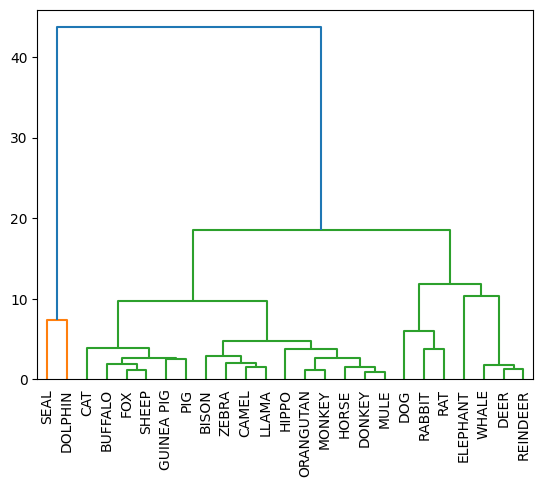

In [46]:
link = 'weighted'
mergings = linkage(milk,method=link)
dendrogram(mergings,labels = milk.index)
plt.xticks(rotation = 90);

In [50]:
df_copy = milk.copy()
clust = KMeans(random_state = 25,n_clusters = 2)
clust.fit(milk_scaled)
df_copy['cluster'] = clust.labels_
print(df_copy.groupby('cluster').mean())

df_copy[df_copy['cluster'] == 0],df_copy[df_copy['cluster'] == 1]

             water    protein        fat   lactose       ash
cluster                                                     
0        63.362500  10.412500  21.662500  1.975000  1.347500
1        85.158824   4.235294   4.964706  5.147059  0.635294


(          water  protein   fat  lactose   ash  cluster
 Animal                                                
 DOG        76.3      9.3   9.5      3.0  1.20        0
 RABBIT     71.3     12.3  13.1      1.9  2.30        0
 RAT        72.5      9.2  12.6      3.3  1.40        0
 DEER       65.9     10.4  19.7      2.6  1.40        0
 REINDEER   64.8     10.7  20.3      2.5  1.40        0
 WHALE      64.8     11.1  21.2      1.6  1.70        0
 SEAL       46.4      9.7  42.0      0.0  0.85        0
 DOLPHIN    44.9     10.6  34.9      0.9  0.53        0,
             water  protein   fat  lactose   ash  cluster
 Animal                                                  
 HORSE        90.1      2.6   1.0      6.9  0.35        1
 ORANGUTAN    88.5      1.4   3.5      6.0  0.24        1
 MONKEY       88.4      2.2   2.7      6.4  0.18        1
 DONKEY       90.3      1.7   1.4      6.2  0.40        1
 HIPPO        90.4      0.6   4.5      4.4  0.10        1
 CAMEL        87.7      3.5   3.4

<h1 style = 'color:orange'>Nutrient Dataset</h1>

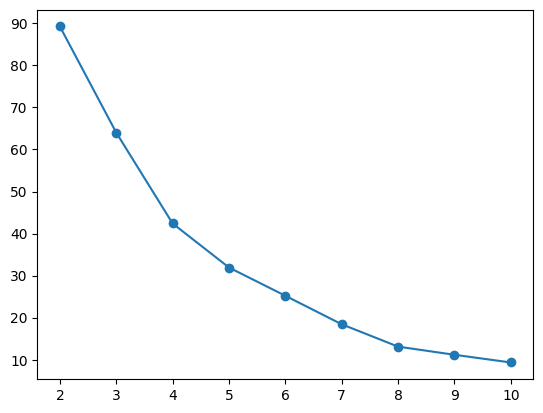

In [55]:
nutrients = pd.read_csv('../Datasets/nutrient.csv',index_col=0)
scaler = StandardScaler().set_output(transform='pandas')

nut_scaled = scaler.fit_transform(nutrients)
wss = []
for i in range(2,11):
    clust = KMeans(random_state=25,n_clusters=i)
    clust.fit(nut_scaled)
    wss.append([i,clust.inertia_])
wss = pd.DataFrame(wss,columns=['clusters','WSS'])
plt.scatter(wss['clusters'],wss['WSS'])
plt.plot(wss['clusters'],wss['WSS']);

In [56]:
#comparing silhouette score

scores = []
for i in range(2,11):
    clust = KMeans(random_state = 25,n_clusters=i)
    clust.fit(nut_scaled)
    scores.append([i,silhouette_score(nut_scaled,clust.labels_)])
score = pd.DataFrame(scores,columns=['Clusters','Scores'])
score.sort_values('Scores',ascending=False)

,Clusters,Scores
2,4,0.419974
5,7,0.402943
4,6,0.381370
3,5,0.378018
7,9,0.377910
6,8,0.377523
8,10,0.366987
1,3,0.357822
0,2,0.325778


In [59]:
#best cluster count ->4
clust = KMeans(random_state=25,n_clusters=4)
clust.fit(nut_scaled)
nut_copy = nutrients.copy()
nut_copy['clusters'] = clust.labels_
nut_copy.groupby('clusters').mean(),nut_copy[nut_copy['clusters'] == 0],nut_copy[nut_copy['clusters'] == 1],nut_copy[nut_copy['clusters'] == 2],nut_copy[nut_copy['clusters'] == 3]

(              energy    protein        fat     calcium      iron
 clusters                                                        
 0         151.666667  18.333333   7.666667  227.666667  1.666667
 1         341.875000  18.750000  28.875000    8.750000  2.437500
 2         163.928571  20.714286   7.714286   19.857143  2.028571
 3          57.500000   9.000000   1.000000   78.000000  5.700000,
                  energy  protein  fat  calcium  iron  clusters
 Food_Item                                                     
 MACKEREL CANNED     155       16    9      157   1.8         0
 SALMON CANNED       120       17    5      159   0.7         0
 SARDINES CANNED     180       22    9      367   2.5         0,
                      energy  protein  fat  calcium  iron  clusters
 Food_Item                                                         
 BEEF BRAISED            340       20   28        9   2.6         1
 BEEF ROAST              420       15   39        7   2.0         1
 BEEF STEA